<a href="https://colab.research.google.com/github/med-fakil/ML-AMCHD-/blob/main/Mini_projet_ML(optimisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
import os

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/archive.zip'
import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

In [4]:
data_dir = pathlib.Path('/content/datasets/AMHCD_64/AMHCD_64')
print("Le répertoire de données : {} ".format(data_dir))

Le répertoire de données : /content/datasets/AMHCD_64/AMHCD_64 


In [5]:
image_count = len(list(data_dir.glob('*/*')))
print("Nombre des images de la base de données : {} ".format(image_count))

Nombre des images de la base de données : 25740 


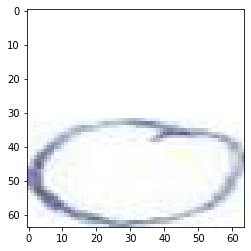

In [6]:
#Exemple d'une image
image = plt.imread("/content/datasets/AMHCD_64/AMHCD_64/ya/ya_1.jpeg")
plt.imshow(image)

In [ ]:
#Dimension des image
image.shape

(64, 64, 3)

In [7]:
#Taille des images
img_height = 32
img_width = 32

In [8]:
# train_data est un objet tensor, chaque élement est un tuple (image,label) 
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=1,
  )


Found 25740 files belonging to 33 classes.
Using 20592 files for training.


In [9]:
# val_data est un objet tensor, chaque élement est un tuple (image,label) 
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=batch_size,
  )

Found 25740 files belonging to 33 classes.
Using 5148 files for validation.


In [10]:
class_names = val_data.class_names
print("Les classes :")
print(class_names)
print("Nombre de classe : {} ".format(len(class_names)))

Les classes :
['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Nombre de classe : 33 


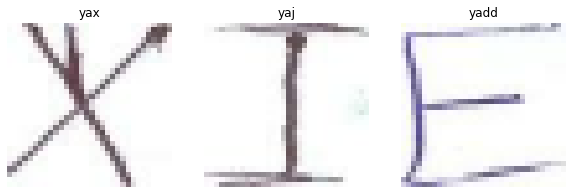

In [ ]:
#Visualiser qlq données
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
num_classes = 33

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(32, 32, 3)),

    layers.Conv2D(32,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),

    layers.Conv2D(64,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),
    
    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                   histogram_freq=1, 
                                                   write_images=logdir,
                                                   embeddings_data=train_data)


historique = model.fit( 
             train_data,
             validation_data=val_data,
             epochs=2,
             callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20591/20592 [============================>.] - ETA: 0s - loss: 0.9961 - accuracy: 0.7262

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

In [ ]:
import pandas as pd
metrics = pd.DataFrame(historique.history)

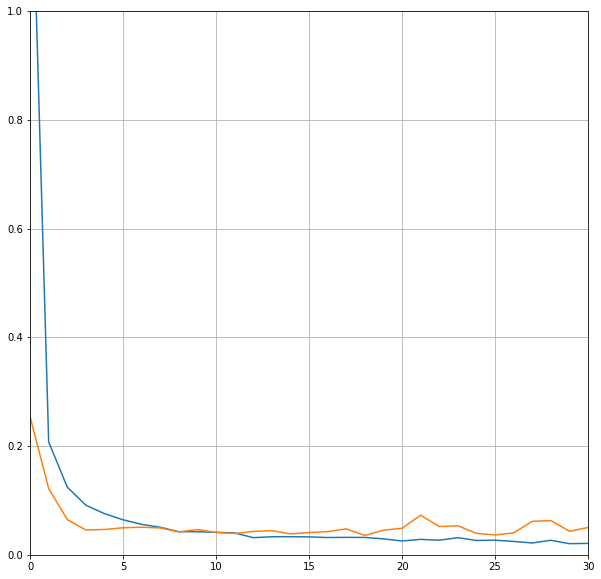

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["loss","val_loss"]])
plt.grid(True)
plt.show()

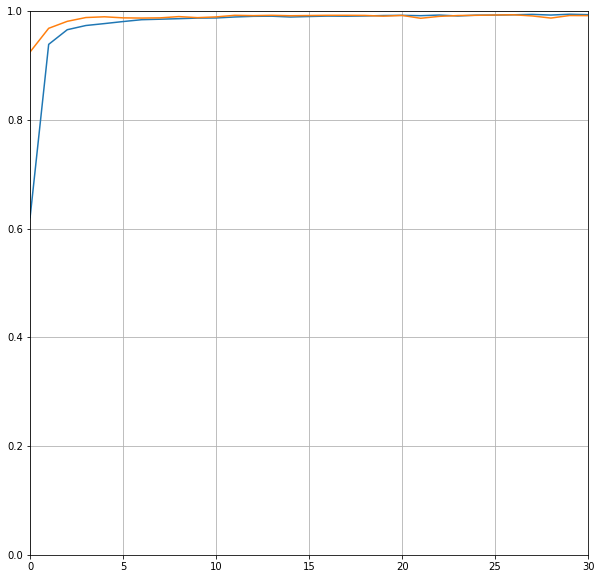

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["accuracy","val_accuracy"]])
plt.grid(True)
plt.show()

In [ ]:
#--------------------------------------------------------------------------------------------------------------

In [11]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 14.8 MB/s 
     |████████████████████████████████| 1.6 MB 61.8 MB/s 


In [12]:
import keras_tuner
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import layers, losses
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import MaxPool2D

In [23]:
"""
tuner = keras_tuner.BayesianOptimization(
                        hypermodel=MyHyperModel(),
                        objective = "val_accuracy",
                        max_trials =10, #max candidates to test
                        overwrite=True,
                        directory='BO_search_dir',
                        project_name='sign_language_cnn')
"""

'\ntuner = keras_tuner.BayesianOptimization(\n                        hypermodel=MyHyperModel(),\n                        objective = "val_accuracy",\n                        max_trials =10, #max candidates to test\n                        overwrite=True,\n                        directory=\'BO_search_dir\',\n                        project_name=\'sign_language_cnn\')\n'

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def build_model(hp):
    #defining model
    model=Sequential()
    model.add(Rescaling(1./255))
    model.add(Conv2D(hp.Int('input_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3), padding="same", input_shape=(32, 32, 3)))
    
    # Number of Conv Layers is up to tuning
    for i in range( hp.Int("num_conv", min_value=1, max_value=5, step=1)) :
      model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3),
                                padding='same',
                                activation='relu'))
      
      
      model.add(MaxPool2D(pool_size=(2, 2)))
      model.add(Dropout(0.5))

    model.add(Flatten())

    for i in range(hp.Int("num_dense", min_value=1, max_value=4, step=1)) :
       model.add(Dense(hp.Choice(f'n_nodes',
                                  values=[64,128, 256, 512, 1024]),activation="relu"))
       
       
    model.add(Dense(33,activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [14]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch( build_model,
                      max_trials=5,  # how many model variations to test?
                      objective = "val_accuracy",
                      executions_per_trial=3,  # how many trials per variation? (same model could perform differently)
                      )

<ipython-input-14-c71820cb3b24>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [15]:
tuner.search(x=train_data, epochs=10,
             validation_data=val_data)

Trial 5 Complete [00h 07m 05s]
val_accuracy: 0.5802253459890684

Best val_accuracy So Far: 0.9892514745394388
Total elapsed time: 00h 34m 43s


In [17]:
print(tuner.get_best_hyperparameters()[0].values)

{'input_units': 128, 'num_conv': 3, 'conv_0_units': 64, 'num_dense': 1, 'n_nodes': 1024, 'conv_1_units': 160, 'conv_2_units': 160, 'conv_3_units': 160}


In [18]:
model = tuner.get_best_models(num_models=1)[0]
